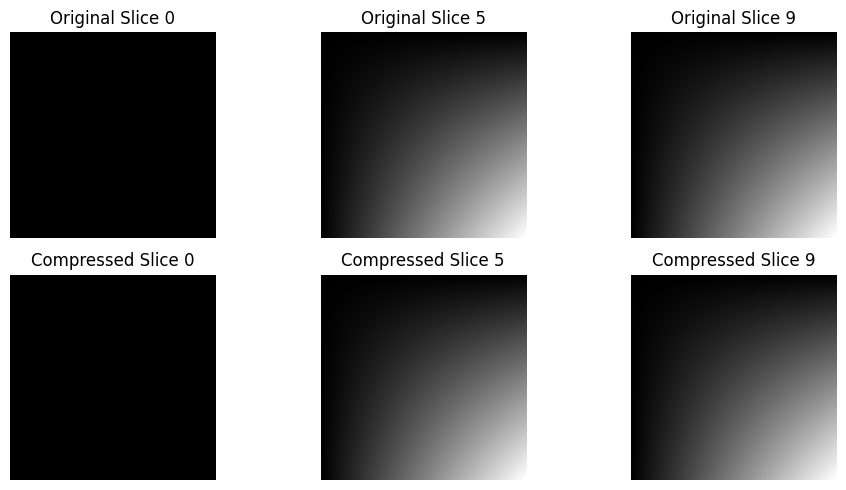

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a synthetic 3D gradient image (stack of 2D images)
depth, rows, cols = 10, 100, 100
A_3D = np.array([np.outer(np.linspace(0, d/depth, rows), np.linspace(0, 1, cols)) for d in range(depth)])

# Apply SVD and compression on each 2D slice
k = 5
compressed_3D = []
for slice in A_3D:
    U, Sigma, Vt = np.linalg.svd(slice, full_matrices=False)
    U_k = U[:, :k]
    Sigma_k = np.diag(Sigma[:k])
    Vt_k = Vt[:k, :]
    compressed_slice = np.dot(U_k, np.dot(Sigma_k, Vt_k))
    compressed_3D.append(compressed_slice)
compressed_3D = np.array(compressed_3D)

# Visualize a few slices from the original and compressed 3D images
slices_to_show = [0, depth//2, depth-1]

plt.figure(figsize=(10, 5))
for idx, slice_idx in enumerate(slices_to_show, 1):
    plt.subplot(2, len(slices_to_show), idx)
    plt.imshow(A_3D[slice_idx], cmap='gray')
    plt.title(f'Original Slice {slice_idx}')
    plt.axis('off')
    
    plt.subplot(2, len(slices_to_show), idx + len(slices_to_show))
    plt.imshow(compressed_3D[slice_idx], cmap='gray')
    plt.title(f'Compressed Slice {slice_idx}')
    plt.axis('off')

plt.tight_layout()
plt.show()